Домашнее задание по прогаммированию на Python

In [67]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Загрузим наш датасет из csv-файла

In [10]:
df = pd.read_csv(r'periodic_table.csv', encoding='windows-1251', index_col=0, sep=',')

1. Посмотрим на параметры распределений числовых признаков и построим графики наиболее интересных

In [11]:
numerical = df.select_dtypes(include=[np.number]).columns.values

# min, max

for sign in numerical:
    print(f'{sign}: min - {df[sign].min()}, max - {df[sign].max()}')

atomic_number: min - 1, max - 118
period: min - 1, max - 7
atomic_weight: min - 1.008, max - 294.0
per_shell: min - 1, max - 2
density_at_stp: min - 0.08988, max - 9.73
when_liquid_at_mp: min - 0.07, max - 20.0
when_liquid_at_bp: min - 0.07099, max - 4.4
triple_point: min - 2.177, max - 4600.0
critical_point: min - 5.1953, max - 5205.0
van_der_waals_radius: min - 120.0, max - 348.0
at_t_(k): min - 12.0, max - 3477.0
sublimation_point: min - 887.0, max - 3915.0
band_gap: min - 0.67, max - 1.12
curie_point: min - 1043.0, max - 1043.0
thermal_diffusivity: min - 54.3, max - 174.0


In [13]:
for sign in numerical:
    print(f'{sign}: mean - {df[sign].mean()}')

atomic_number: mean - 59.11965811965812
period: mean - 5.239316239316239
atomic_weight: mean - 145.4584061082051
per_shell: mean - 1.9914529914529915
density_at_stp: mean - 2.7183345454545456
when_liquid_at_mp: mean - 7.495220588235294
when_liquid_at_bp: mean - 1.5972627272727273
triple_point: mean - 493.2208875
critical_point: mean - 1148.0253375
van_der_waals_radius: mean - 196.6909090909091
at_t_(k): mean - 1417.3333333333333
sublimation_point: mean - 2401.0
band_gap: mean - 0.895
curie_point: mean - 1043.0
thermal_diffusivity: mean - 114.15


In [14]:
for sign in numerical:
    print(f'{sign}: median - {df[sign].median()}')


atomic_number: median - 59.0
period: median - 6.0
atomic_weight: median - 140.907662
per_shell: median - 2.0
density_at_stp: median - 1.696
when_liquid_at_mp: median - 6.73
when_liquid_at_bp: median - 1.3954
triple_point: median - 138.59
critical_point: median - 513.5
van_der_waals_radius: median - 188.0
at_t_(k): median - 1472.0
sublimation_point: median - 2401.0
band_gap: median - 0.895
curie_point: median - 1043.0
thermal_diffusivity: median - 114.15


In [43]:
total = len(df)
drop_nan = len(df.dropna())
print(f'Total: {total}, without NaN: {drop_nan}')

Total: 117, without NaN: 0


In [54]:
# Посмотрим в каких столбцах есть пропуски
# и составим список признаков, в которых пропусков больше половины

half_nan = []

for column in df.columns:
    percent = round(np.mean(df[column].isnull()) * 100)
    print(f'{column}: null is {percent}%')
    if percent > 55:
        half_nan.append(column)

name: null is 0%
symbol: null is 0%
name_symbol: null is 0%
pronunciation: null is 0%
appearance: null is 13%
atomic_number: null is 0%
group_block: null is 0%
period: null is 0%
element_category: null is 0%
atomic_weight: null is 0%
electron_configuration: null is 0%
per_shell: null is 0%
color: null is 98%
phase: null is 1%
melting_point: null is 10%
boiling_point: null is 12%
density_at_stp: null is 91%
when_liquid_at_mp: null is 42%
when_liquid_at_bp: null is 91%
triple_point: null is 86%
critical_point: null is 79%
heat_of_fusion: null is 16%
heat_of_vaporization: null is 23%
molar_heat_capacity: null is 23%
p_(pa): null is 23%
oxidation_states: null is 0%
electronegativity: null is 14%
ionization_energies: null is 6%
covalent_radius: null is 6%
van_der_waals_radius: null is 53%
crystal_structure: null is 5%
speed_of_sound: null is 90%
thermal_conductivity: null is 18%
magnetic_ordering: null is 17%
cas_number: null is 0%
discovery: null is 29%
named_by: null is 87%
iso: null is 0

Сделаем копию датасета и удалим признаки с большим кол-вом пропусков (больше 55%)

In [55]:
new_df = df.copy()
new_df = new_df.drop(columns=half_nan)

Посмотрим, какие признаки имеют близкое к нормальному распеределению

['name' 'symbol' 'name_symbol' 'pronunciation' 'appearance'
 'atomic_number' 'group_block' 'period' 'element_category' 'atomic_weight'
 'electron_configuration' 'per_shell' 'phase' 'melting_point'
 'boiling_point' 'when_liquid_at_mp' 'heat_of_fusion'
 'heat_of_vaporization' 'molar_heat_capacity' 'p_(pa)' 'oxidation_states'
 'electronegativity' 'ionization_energies' 'covalent_radius'
 'van_der_waals_radius' 'crystal_structure' 'thermal_conductivity'
 'magnetic_ordering' 'cas_number' 'discovery' 'iso' 'at_t_(k)' 'naming'
 'density_near_rt' 'atomic_radius' 'speed_of_sound_thin_rod'
 'thermal_expansion' 'electrical_resistivity' 'youngs_modulus'
 'shear_modulus' 'bulk_modulus' 'mohs_hardness' 'brinell_hardness'
 'poisson_ratio']


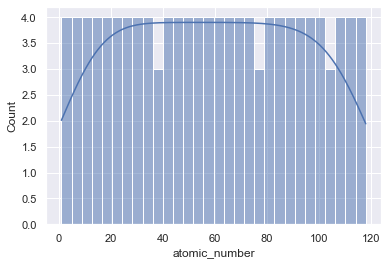

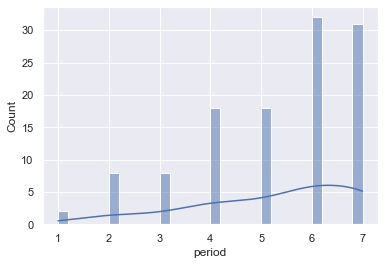

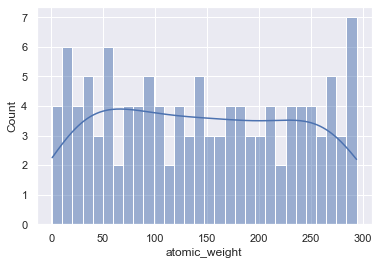

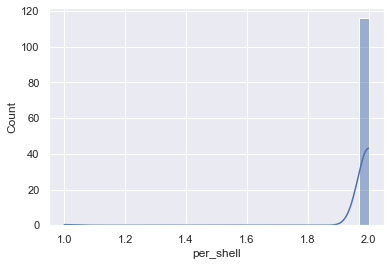

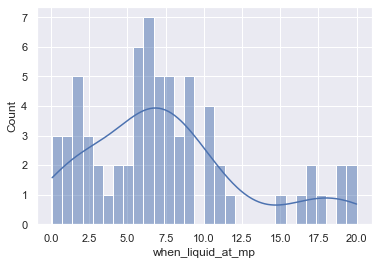

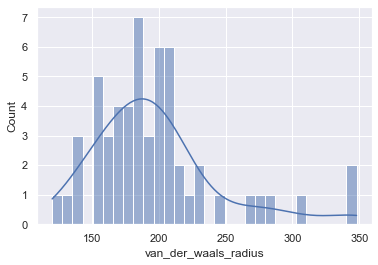

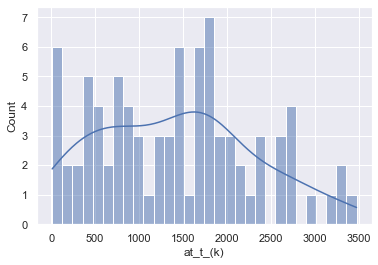

<Figure size 432x288 with 0 Axes>

In [56]:
print(new_df.columns.values)
new_num = new_df.select_dtypes(include=[np.number]).columns.values
for sign in new_num:
    sns.histplot(new_df[sign], kde=True, bins=30)
    plt.figure()

Исходя из графиков, близкое к нормальному распределению имеет радиус Ван-дер-Ваальса, рассмотрим его подробнее

Построим гистограмму и коробчатую диаграмму признака van_der_waals_radius

<AxesSubplot:>

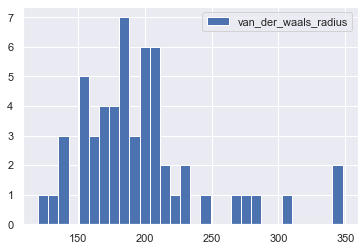

In [57]:
new_df['van_der_waals_radius'].hist(bins=30, legend=True)

<AxesSubplot:>

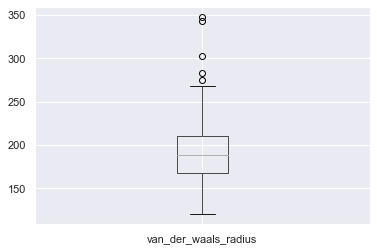

In [58]:
new_df.boxplot(column=['van_der_waals_radius'])

Видим выбросы выше значения 270, попробуем отросить и построить диаграмму без них

<AxesSubplot:>

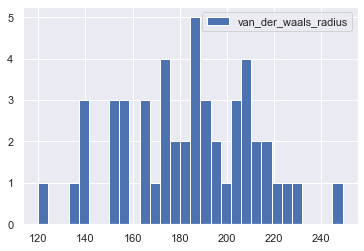

In [60]:
new_van_der_v = df['van_der_waals_radius'] < 250

new_df[new_van_der_v]['van_der_waals_radius'].hist(bins=30, legend=True)

<AxesSubplot:>

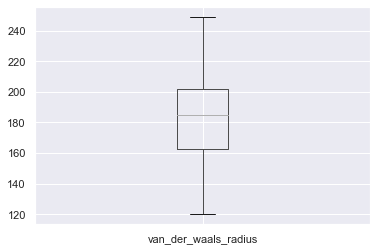

In [61]:
new_df[new_van_der_v].boxplot(column=['van_der_waals_radius'])

<Figure size 432x288 with 0 Axes>

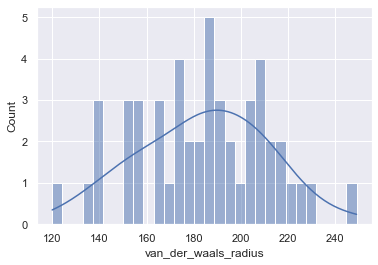

<Figure size 432x288 with 0 Axes>

In [62]:
sns.histplot(new_df[new_van_der_v]['van_der_waals_radius'], kde=True, bins=30)
plt.figure()

In [63]:
df.corr()
num_df = new_df.select_dtypes(include=('int', 'float'))
corr_matrix = num_df.corr()
corr_matrix

,atomic_number,period,atomic_weight,per_shell,when_liquid_at_mp,van_der_waals_radius,at_t_(k)
atomic_number,1.000000,0.946984,0.999240,0.158914,0.777432,0.369257,0.249991
period,0.946984,1.000000,0.940091,0.244469,0.662949,0.531613,0.328344
atomic_weight,0.999240,0.940091,1.000000,0.150751,0.777460,0.366923,0.240567
per_shell,0.158914,0.244469,0.150751,1.000000,0.179241,0.224237,NaN
when_liquid_at_mp,0.777432,0.662949,0.777460,0.179241,1.000000,-0.268480,0.658801
van_der_waals_radius,0.369257,0.531613,0.366923,0.224237,-0.268480,1.000000,-0.095490
at_t_(k),0.249991,0.328344,0.240567,NaN,0.658801,-0.095490,1.000000


<AxesSubplot:>

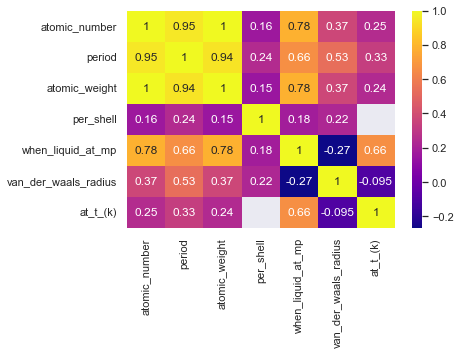

In [64]:
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

Если не брать зависимость атомного номера и массы, самыми скоррелированными признаками, исходя из матрицы,
являются температура плавления и атомный номер, они попадают в группу высокая положительная

Построим график зависимости этих признаков

<Figure size 720x720 with 0 Axes>

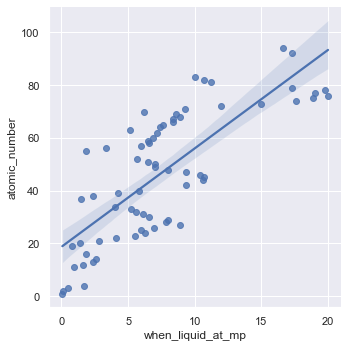

<Figure size 720x720 with 0 Axes>

In [65]:
sns.lmplot(data=num_df, x='when_liquid_at_mp', y='atomic_number')
plt.figure(figsize=(10, 10))


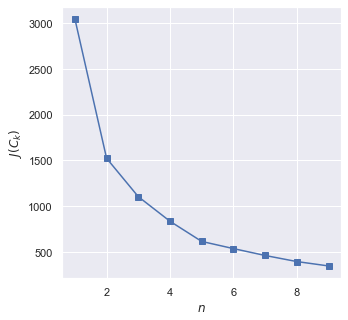

In [69]:
X = num_df.copy()
X = X.dropna()
inertia = []

_range = range(1, 10)

for i  in _range:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.figure(figsize=(5, 5))
plt.plot(_range, inertia, marker='s')
plt.grid(visible=True)
plt.xlabel('$n$')
plt.ylabel('$J(C_k)$')
plt.show()

Из графика видно, что J(Ck) падает сильно с (1 до 2) и (2 до 3), с 3 до 4 уже не так сильно, поэтому оптимальное  = 3

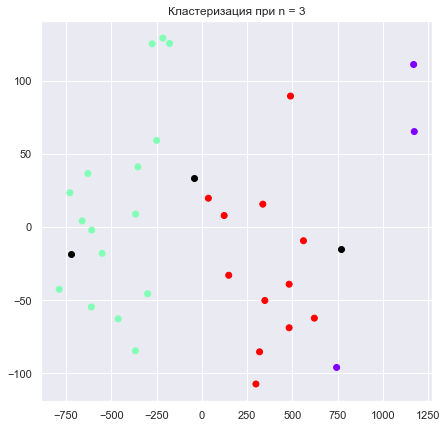

In [72]:
data_x_y = PCA(n_components=2, random_state=42).fit_transform(X)

clusterer = KMeans(n_clusters=3, random_state=42)
cluster_labels = clusterer.fit_predict(X)
data_x_y_cluster_centers = PCA(n_components=2, random_state=42).fit_transform(clusterer.cluster_centers_)

plt.figure(figsize=(7, 7))
plt.scatter(data_x_y[:,0], data_x_y[:,1], c=cluster_labels, cmap ='rainbow')
plt.scatter(data_x_y_cluster_centers[:,0], data_x_y_cluster_centers[:,1], color='black')
plt.title(f'Кластеризация при n = {3}')
plt.show()

Не очень успешная корреляция, мало данных